# Cyclistic Case Study
Author: Anisha Sharma

## Summary
Cyclistic is a fictional startup which launched a successful bike-sharing program in 2016 with a fleet of 5,824 bikes and 692 stations across Chicago. The bikes can be picked up and returned to any station anytime. Cyclistic's marketing strategy has focused on appealing to a broad audience with flexible pricing options for single-ride, full-day, and annual passes.
The company's finance analysts have determined that annual members are more profitable than casual riders, and their goal is to convert casual riders into members. To do this, the marketing team wants to better understand the differences between the two groups and use data analysis to identify trends.

# 1.- Ask

### Key Stakeholders.
* Lily Moreno: Director of marketing and manager.
* Cyclistic marketing analytics team.
* Cyclistic executive team.

### Business task.

Identify the differences between “casual” and “member” users, in order to build marketing strategies to convince casual users to turn into members.

# 2.-Prepare

### Dataset used.
The data is public data provided by Motivate International Inc. Under a license agreement made between Lyft Bikes and Scooters, LLC. and the city of Chicago. The license can be read [here](https://ride.divvybikes.com/data-license-agreement).

### Information about our dataset.
Data is available from april 2021 to march 2022. Every dataset files are in CSV format, and divided between the months.

### Data organization.
For our purpose, we will use all the data available.

# 3. Process
### Loading the datasets

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/202201-divvy-tripdata.csv
/content/202111-divvy-tripdata.csv
/content/202202-divvy-tripdata.csv
/content/202109-divvy-tripdata.csv
/content/202105-divvy-tripdata.csv
/content/202108-divvy-tripdata.csv
/content/202203-divvy-tripdata.csv
/content/202107-divvy-tripdata.csv
/content/202104-divvy-tripdata.csv
/content/202110-divvy-tripdata.csv
/content/202106-divvy-tripdata.csv
/content/202112-divvy-tripdata.csv
/content/cleaned_data.csv
/content/.config/.last_survey_prompt.yaml
/content/.config/.last_opt_in_prompt.yaml
/content/.config/config_sentinel
/content/.config/.last_update_check.json
/content/.config/default_configs.db
/content/.config/gce
/content/.config/active_config
/content/.config/logs/2024.07.09/13.20.17.791346.log
/content/.config/logs/2024.07.09/13.21.00.378803.log
/content/.config/logs/2024.07.09/13.20.49.880826.log
/content/.config/logs/2024.07.09/13.20.38.868154.log
/content/.config/logs/2024.07.09/13.20.59.763396.log
/content/.config/logs/2024.07.09/13.20.48.7

In [3]:
april_21 = pd.read_csv('/content/202104-divvy-tripdata.csv')
may_21 = pd.read_csv('/content/202105-divvy-tripdata.csv')
june_21 = pd.read_csv('/content/202106-divvy-tripdata.csv')
july_21 = pd.read_csv('/content/202107-divvy-tripdata.csv')
august_21 = pd.read_csv('/content/202108-divvy-tripdata.csv')
september_21 = pd.read_csv('/content/202109-divvy-tripdata.csv')
october_21 = pd.read_csv('/content/202110-divvy-tripdata.csv')
november_21 = pd.read_csv('/content/202111-divvy-tripdata.csv')
december_21 = pd.read_csv('/content/202112-divvy-tripdata.csv')
january_22 = pd.read_csv('/content/202201-divvy-tripdata.csv')
february_22 = pd.read_csv('/content/202202-divvy-tripdata.csv')
march_22 = pd.read_csv('/content/202203-divvy-tripdata.csv')

### Combining the datasets

In [4]:
df = pd.concat([april_21,may_21,june_21,july_21,august_21,september_21,october_21,november_21,december_21,january_22,february_22,march_22])
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284037,E23BE3DB740BE3B4,docked_bike,2022-03-13 16:31:03,2022-03-13 16:39:32,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,casual
284038,15AF71F3220F2A75,docked_bike,2022-03-09 06:56:02,2022-03-09 07:42:14,Broadway & Barry Ave,13137,Ravenswood Ave & Berteau Ave,TA1309000018,41.937582,-87.644098,41.957921,-87.673567,casual
284039,9C4CE6CC19F8225B,electric_bike,2022-03-09 15:55:26,2022-03-09 16:08:54,NaN,NaN,Albany Ave & Montrose Ave,15621,41.940000,-87.710000,41.961041,-87.705866,member
284040,F4E136DEF696F3AE,electric_bike,2022-03-21 16:12:44,2022-03-21 16:18:24,NaN,NaN,Larrabee St & Division St,KA1504000079,41.910000,-87.650000,41.903486,-87.643353,member


### Overall information about the dataset
Let's check some information about our dataset

In [5]:
df.shape

(5723532, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5723532 entries, 0 to 284041
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 611.3+ MB


### Cleaning

Checking null values and duplicates

In [7]:
# Cheking for duplicate values
df['ride_id'].duplicated().sum()

0

In [8]:
# Checking for null values
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    745376
start_station_id      745373
end_station_name      796247
end_station_id        796247
start_lat                  0
start_lng                  0
end_lat                 4716
end_lng                 4716
member_casual              0
dtype: int64

In [9]:
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    745376
start_station_id      745373
end_station_name      796247
end_station_id        796247
start_lat                  0
start_lng                  0
end_lat                 4716
end_lng                 4716
member_casual              0
dtype: int64

High number of null values in some columns, but what percentage of the data is missing?

In [10]:
# Calculating the percentage of null values
print('The percentage of missing values is:',round((df.isna().sum().max() * 100)/df.shape[0],2),'%')

The percentage of missing values is: 13.91 %


"13% of the data has missing values, specifically in columns with the highest number of null entries. While this seems significant and could potentially introduce bias into our analysis, these columns contain information about the names and IDs of the stations where the rides began and ended. Although this information has some value, it is not critical to our analysis. Therefore, instead of deleting the rows with these missing values, which could compromise our analysis, we decided to retain these incomplete entries since we will not be using these particular variables."

### Formatting columns

Check if the data types align with the desired formats for each column

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5723532 entries, 0 to 284041
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 611.3+ MB


Observe that the 'started_at' and 'ended_at' columns are Dtype objects, but should be dates. Let's change that

In [12]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

### Deleting invalid entries
Ensure there are no incorrect or erroneously recorded dates.

In [13]:
false_dates = df.loc[(df['started_at'] > df['ended_at'])]
false_dates.shape

(145, 13)

"There are 145 incorrect entries where the 'started_at' column has a datetime value later than the corresponding 'ended_at' value. This is not possible, as the start of the trip must precede the end of the trip."

In [14]:
#deleting the wrong entries
df = df.drop(false_dates.index.to_list()).copy()

### Adding columns.
Add some columns, for example length of the ride, day of the week, hour of the day, and name of the month to use them later during analysis phase

In [15]:
df['ride_length_min'] = ((df['ended_at'] - df['started_at'])/pd.Timedelta(minutes=1)).astype('int32')

In [16]:
# Creating the name of the day of the week
df['day'] = df['started_at'].dt.day_name()

# creating the hour of the day
df['hour'] = df['started_at'].dt.hour

# Creating the month column
df['month'] = df['started_at'].dt.month

df['day_of_week'] = df['started_at'].dt.dayofweek

With recently created columns, sort the values in ascending order

In [17]:
df.sort_values(by='ride_length_min',ascending=True)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length_min,day,hour,month,day_of_week
298935,109E1D34D9F9E595,electric_bike,2021-11-10 18:34:28,2021-11-10 18:34:40,Rush St & Cedar St,KA1504000133,NaN,NaN,41.902464,-87.627802,41.900000,-87.630000,member,0,Wednesday,18,11,2
547654,44133F3A381849A9,electric_bike,2021-10-27 08:02:58,2021-10-27 08:03:00,St. Clair St & Erie St,13016,St. Clair St & Erie St,13016,41.894194,-87.622822,41.894208,-87.622864,casual,0,Wednesday,8,10,2
296317,80198B33C8BE45AB,electric_bike,2021-10-22 17:58:48,2021-10-22 17:59:12,Racine Ave & Fullerton Ave,TA1306000026,Racine Ave & Fullerton Ave,TA1306000026,41.925635,-87.658281,41.925636,-87.658291,member,0,Friday,17,10,4
547651,BB6EDF79EE465D8F,electric_bike,2021-10-30 18:43:21,2021-10-30 18:43:25,St. Clair St & Erie St,13016,St. Clair St & Erie St,13016,41.894314,-87.622590,41.894326,-87.622597,member,0,Saturday,18,10,5
547650,4D2296EA5BF64C5C,electric_bike,2021-10-24 13:12:04,2021-10-24 13:12:20,Wolcott (Ravenswood) Ave & Montrose Ave,TA1307000144,Wolcott (Ravenswood) Ave & Montrose Ave,TA1307000144,41.961347,-87.676225,41.961346,-87.676240,member,0,Sunday,13,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640346,99415B003B7E7EEE,docked_bike,2021-07-08 19:29:49,2021-08-11 21:56:58,Kedzie Ave & Milwaukee Ave,13085,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.929567,-87.707857,41.889955,-87.680651,casual,49107,Thursday,19,7,3
81713,E6E1E5BFFD72ECEC,docked_bike,2021-06-05 23:33:51,2021-07-12 13:55:14,Clark St & Lake St,KA1503000012,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.886021,-87.630876,41.889955,-87.680651,casual,52701,Saturday,23,6,5
46321,BDA1217EC8532C7B,docked_bike,2021-05-02 02:56:07,2021-06-08 13:37:43,State St & Van Buren St,TA1305000035,Wells St & Polk St,SL-011,41.877181,-87.627844,41.872596,-87.633502,casual,53921,Sunday,2,5,6
545476,7F0578ABF030FC83,docked_bike,2021-06-04 22:03:33,2021-07-13 14:15:14,Streeter Dr & Grand Ave,13022,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.892278,-87.612043,41.889955,-87.680651,casual,55691,Friday,22,6,4


There are entries in which the rides lasted less than 1 minute. Check what percentage of the data represents this instance.

In [18]:
print('The percentage is:',df.query('ride_length_min == 0').shape[0] / df.shape[0] * 100)

The percentage is: 1.5590461216427505


"Since these entries constitute only 1%, we can delete the rows with ride lengths of less than 1 minute."

In [19]:
zero_length = (df['ride_length_min'] < 1)
zero_length_index = df.loc[zero_length].index.to_list()
df = df.drop(axis=0,index=zero_length_index, inplace=False)

In [20]:
df.query('ride_length_min < 0')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length_min,day,hour,month,day_of_week


### 4. Analysis

Let's conduct some exploratory and statistical analysis on our dataset, with a focus on understanding the business question. Specifically, will examine the differences between members and casual users.

### Describing the data
A quick look at the numerical data with the describe function

In [21]:
round(df.describe(),2)

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,ride_length_min,hour,month,day_of_week
count,5033885,5033885,5033885.00,5033885.00,5029606.00,5029606.00,5033885.00,5033885.00,5033885.00,5033885.00
mean,2021-08-25 21:03:38.844663040,2021-08-25 21:25:35.227382272,41.90,-87.65,41.90,-87.65,21.45,14.23,7.33,3.16
min,2021-04-01 00:03:18,2021-04-01 00:14:29,41.64,-87.84,41.39,-88.97,1.00,0.00,1.00,0.00
25%,2021-06-22 17:17:10,2021-06-22 17:37:44,41.88,-87.66,41.88,-87.66,6.00,11.00,6.00,1.00
50%,2021-08-16 18:52:18,2021-08-16 19:10:57,41.90,-87.64,41.90,-87.64,11.00,15.00,7.00,3.00
75%,2021-10-12 19:17:00,2021-10-12 19:32:30,41.93,-87.63,41.93,-87.63,21.00,18.00,9.00,5.00
max,2022-03-31 23:59:47,2022-04-01 22:10:12,42.07,-87.52,42.15,-87.49,55944.00,23.00,12.00,6.00
std,NaN,NaN,0.05,0.03,0.05,0.03,179.18,5.06,2.54,2.00


The intriguing aspect is the variable ride_length_min. I've observed that the maximum value significantly exceeds the 75 percentile, suggesting potential outliers. It's crucial to consider this in our analysis.

### Number of values
Count the number of values for type of users and rideable type

In [22]:
# Count of member users and casual users
df['member_casual'].value_counts()

member_casual
member    2779130
casual    2254755
Name: count, dtype: int64

In [23]:
# Count of rideable types
df['rideable_type'].value_counts()

rideable_type
classic_bike     2861129
electric_bike    1902466
docked_bike       270290
Name: count, dtype: int64

### Grouping the data
Group the data by type of users and rideable type. This will be useful for further analysis

In [24]:
# Grouping by type of user
user_grp = df.groupby('member_casual')
# Grouping by type of rideable
rideable_grp = df.groupby('rideable_type')

### Max values

In [25]:
# Max ride length by user grp
print('max ride length by user group:')
print()
print(user_grp['ride_length_min'].max())

print()
print('max ride length by rideable type:')
print(rideable_grp['ride_length_min'].max())

max ride length by user group:

member_casual
casual    55944
member     1559
Name: ride_length_min, dtype: int32

max ride length by rideable type:
rideable_type
classic_bike      1559
docked_bike      55944
electric_bike      487
Name: ride_length_min, dtype: int32


"When looking at casual users, particularly those using docked bikes, we notice an exceptionally large maximum value. Doing the math, 55,944 minutes equates to approximately 932 hours. It's hard to imagine anyone riding a bike for that duration.

This clearly stands out as an outlier. Are there similar outliers among other bike types and user categories?"

In [26]:
df.groupby(['member_casual','rideable_type'])['ride_length_min'].max()

member_casual  rideable_type
casual         classic_bike      1559
               docked_bike      55944
               electric_bike      487
member         classic_bike      1559
               electric_bike      480
Name: ride_length_min, dtype: int32

The maximum time for classic bike in both kind of users is 1599 which is about 26 hours, more than a day!. clearly an outlier if it's not someone doing a marathon.

And the maximum time for electric bike is 480, which translates to 8 hours.


### Average and median values

In [27]:
# Average ride length by user group
user_grp['ride_length_min'].mean()

member_casual
casual    31.701661
member    13.130528
Name: ride_length_min, dtype: float64

In [28]:
# Median ride length by user group
user_grp['ride_length_min'].median()

member_casual
casual    16.0
member     9.0
Name: ride_length_min, dtype: float64

In [29]:
# Average ride length by rideable type
rideable_grp['ride_length_min'].mean()

rideable_type
classic_bike     19.576177
docked_bike      82.961090
electric_bike    15.525850
Name: ride_length_min, dtype: float64

In [30]:
# Median ride length by rideable type
rideable_grp['ride_length_min'].median()

rideable_type
classic_bike     12.0
docked_bike      28.0
electric_bike    10.0
Name: ride_length_min, dtype: float64

In [31]:
df.query('member_casual == "member"')['ride_length_min'].mode()

0    4
Name: ride_length_min, dtype: int32

### Frequency of values

Conduct an analysis of the frequency of repeated values within the ride length column to pinpoint where the majority of values lie and determine the percentage of outliers in the dataset.

In [32]:
# I begin by creating a frequency table by grouping together the minutes in 40 bins
frequency_table = df.copy()
frequency_table['freq'] = pd.cut(df['ride_length_min'],40)
frequency = frequency_table.groupby('freq')['day_of_week'].count().reset_index
frequency

<bound method Series.reset_index of freq
(-54.943, 1399.575]      5030055
(1399.575, 2798.15]         3094
(2798.15, 4196.725]          164
(4196.725, 5595.3]            96
(5595.3, 6993.875]            76
(6993.875, 8392.45]           57
(8392.45, 9791.025]           43
(9791.025, 11189.6]           40
(11189.6, 12588.175]          52
(12588.175, 13986.75]         28
(13986.75, 15385.325]         25
(15385.325, 16783.9]          20
(16783.9, 18182.475]          15
(18182.475, 19581.05]         15
(19581.05, 20979.625]          9
(20979.625, 22378.2]          12
(22378.2, 23776.775]          10
(23776.775, 25175.35]         12
(25175.35, 26573.925]         11
(26573.925, 27972.5]           6
(27972.5, 29371.075]           5
(29371.075, 30769.65]          6
(30769.65, 32168.225]          4
(32168.225, 33566.8]           5
(33566.8, 34965.375]           5
(34965.375, 36363.95]          3
(36363.95, 37762.525]          0
(37762.525, 39161.1]           2
(39161.1, 40559.675]           4
(40559.675, 41958.25]          4
(41958.25, 43356.825]          0
(43356.825, 44755.4]           0
(44755.4, 46153.975]           0
(46153.975, 47552.55]          1
(47552.55, 48951.125]          1
(48951.125, 50349.7]           1
(50349.7, 51748.275]           0
(51748.275, 53146.85]          1
(53146.85, 54545.425]          1
(54545.425, 55944.0]           2
Name: day_of_week, dtype: int64>

In [33]:
print('the majority of unbiased values fall within the',round((5030055/df.shape[0] * 100),1),'% of the data')

the majority of unbiased values fall within the 99.9 % of the data


The maximum value, which falls within the 99.9% range of the data, is 1399.57 minutes, equivalent to approximately 23 hours for a ride. To further refine the dataset, we can consider filtering using the 99.5% or 99.0% thresholds of values.

Based on this information, we can determine that outliers represent only 0.1% of the values in the data. However, due to the wide range between the minimum and maximum values, the averages could be somewhat influenced by these outliers. It's important to consider this when sharing our insights.

# 5. Share

In [34]:
yellow = '#f7c41f'
blue = '#3274a1'
green = '#6fb34c'
gray = '#cfd8dc'
light_blue = '#66c2e0'
white = '#FFFFFF'

### Outliers in Ride Length

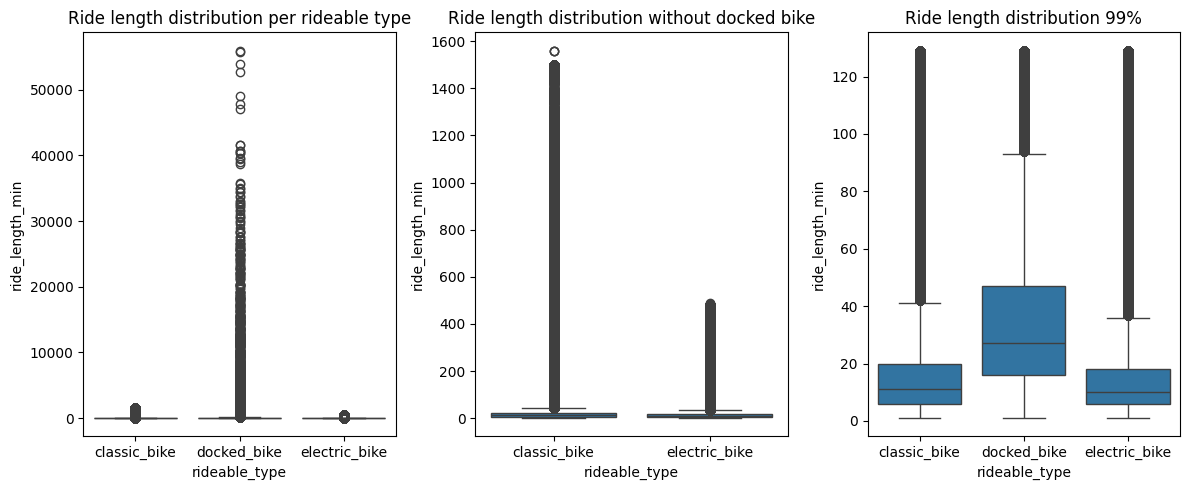

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(12,5),sharex=False)

plt.subplot(1,3,1)
ax1 = sns.boxplot(data=df,x='rideable_type',y='ride_length_min')
ax1.set_title('Ride length distribution per rideable type')

# Filtering out the docked_bike value
no_docked_bike = df.query('rideable_type != "docked_bike"')

plt.subplot(1,3,2)
ax2 = sns.boxplot(data = no_docked_bike, x='rideable_type', y='ride_length_min')
ax2.set_title('Ride length distribution without docked bike')

# Filtering our the 1% of values
percent_99 = np.percentile(df['ride_length_min'],99)
df_99 = df.loc[(df['ride_length_min'] <= percent_99)]

plt.subplot(1,3,3)
ax3 = sns.boxplot(data=df_99,x='rideable_type',y='ride_length_min')
ax3.set_title('Ride length distribution 99%')

plt.tight_layout()
plt.show()

When examining the data, we observe that ride lengths in minutes for docked bikes tend to be significantly higher compared to classic and electric bikes, indicating a bias with numerous outliers.

While classic and electric bikes show fewer outliers initially, a closer inspection reveals outliers extending up to 1600 minutes as seen in the second graph.

In the third graph, we mitigate this by removing the top 1% of values that exceed the normal distribution. This adjustment provides a clearer view of the distribution and percentiles. It visually confirms that:

- The median ride length is 12 minutes for classic bikes,
- 28 minutes for docked bikes,
- 10 minutes for electric bikes.

These values closely align with the average when extreme values (up to 0.1% or 1%) are excluded. They represent typical ride lengths expected from users each time they utilize the bike service.

### Ride length per weekday

Let's see what is the difference between users in terms of ride length per day

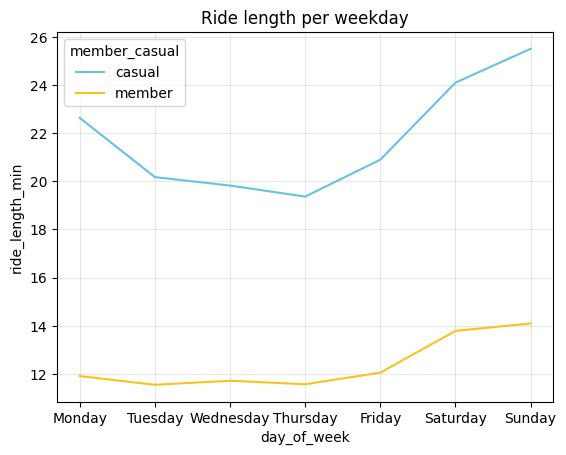

In [36]:
weekday_name = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

fig, ax= plt.subplots(1,1)
day_grp = df_99.groupby(['member_casual','day_of_week'])['ride_length_min'].mean().reset_index()
sns.lineplot(data=day_grp, x='day_of_week',y='ride_length_min',hue='member_casual',palette=[light_blue,yellow],sizes=[20,20])
ax.set_xticks(range(len(weekday_name)))
ax.set_xticklabels(weekday_name)

plt.title('Ride length per weekday')
plt.grid(visible=True,alpha=0.3)

plt.show()

Casual users average ride lengths tend to decrease during weekdays and increase on weekends. On the other hand, for member users, although there is also an increase in ride lengths during weekends, weekdays (Monday to Friday) show a consistent average ride length of around 12 minutes.

### Percentage of members and casual users

What is the proportion of members and casual users from the total?

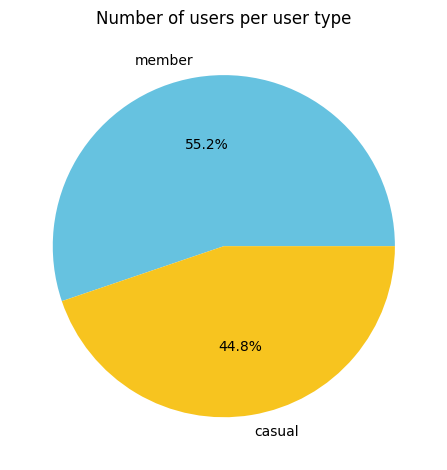

In [37]:
users = df['member_casual']

plt.pie(users.value_counts(),labels=users.unique(),colors=[light_blue, yellow],autopct="%1.1f%%")

plt.title('Number of users per user type')
plt.tight_layout()
plt.show()

### Number of rides per user type

How many rides each type of user did? and for every type of rideable?

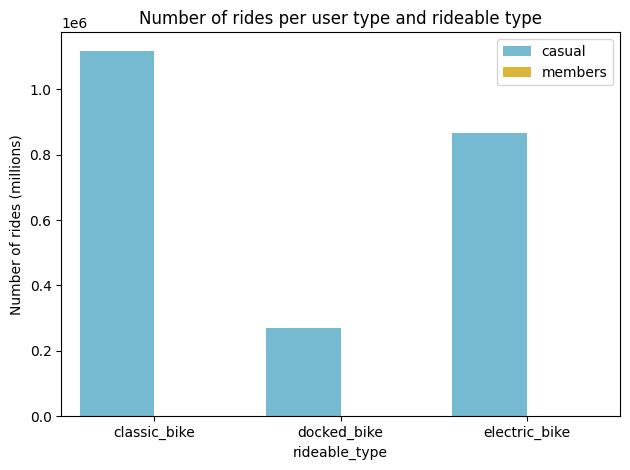

In [38]:
ride_user_grp = df.groupby(['member_casual','rideable_type'])['ride_id'].count().reset_index(name='count')

ax = sns.barplot(data=ride_user_grp,x='rideable_type',y='count',hue='member_casual',palette=[light_blue,yellow],hue_order=['casual','members'])

plt.ylabel('Number of rides (millions)')

plt.legend()
plt.title('Number of rides per user type and rideable type')
plt.tight_layout()

plt.show()

We can see that the members ride more often than casual members in both classic and electric bikes, and we also see a lack of usage of the docked bikes by members

### Number of rides per month

What are the tendencies in the number of rides each type of user did each month?

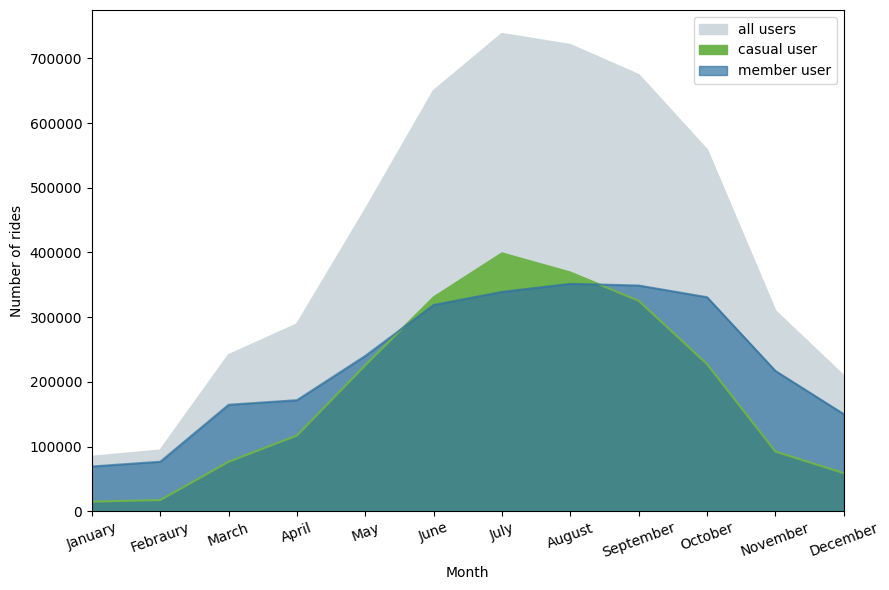

In [39]:
months = ['','January','Febraury','March','April','May','June','July','August','September','October','November','December']

fig, ax =plt.subplots(1,1,figsize=(9,6))

df['month'].value_counts().sort_index().plot(kind='area', label='all users',color=gray,alpha=1)
df.query('member_casual == "casual"')['month'].value_counts().sort_index().plot(kind='area', label='casual user',color=green,alpha=1)
df.query('member_casual == "member"')['month'].value_counts().sort_index().plot(kind='area', label='member user',color=blue,alpha=0.7)

ax.set_xticks(range(len(months)))
ax.set_xticklabels(months)

plt.xlim([1,12])
plt.xticks(rotation=20)
plt.legend()
plt.xlabel('Month')
plt.ylabel('Number of rides')
plt.tight_layout()
plt.show()

Across all user types, we observe an increase in ride numbers during the spring and a peak in the summer months, followed by a decline entering autumn and winter.

However, members tend to sustain their ride frequency through the summer and autumn seasons. In contrast, casual users show a spike in mid-summer but experience a more pronounced decline compared to members.

### Number of rides per weekday

Are there any tendencies in the number of rides per each day of the week?

Index(['count'], dtype='object')


Text(0.5, 1.0, 'Number of rides per day')

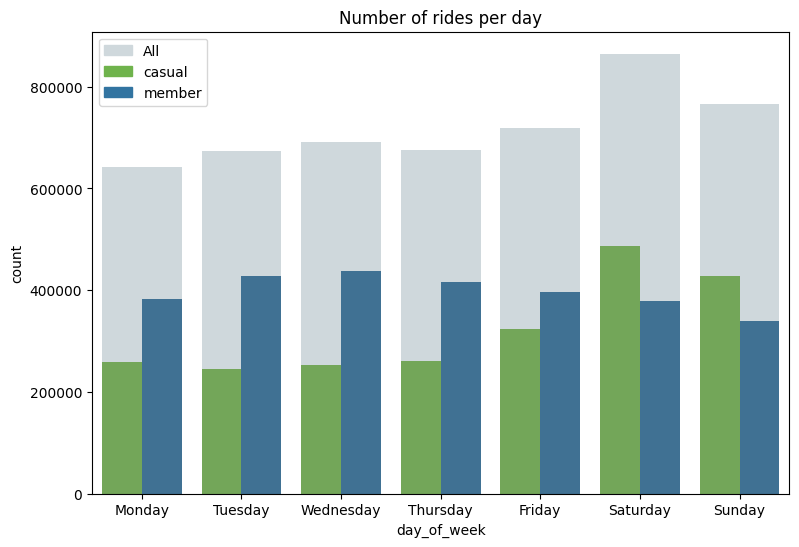

In [40]:
import matplotlib.patches as mpatches

fig, ax =plt.subplots(1,1,figsize=(9,6))

ride_per_day = df['started_at'].dt.dayofweek.value_counts().sort_index(ascending=True).to_frame()
# Verify the column name in ride_per_day DataFrame
print(ride_per_day.columns)

user_day = user_grp['day_of_week'].value_counts().rename_axis(['member_casual','day_of_week']).reset_index(name='count')

user_palette = {'casual':'tab:green', 'member':'tab:blue'}
plt.bar(ride_per_day.index,ride_per_day['count'],color=gray)
sns.barplot(data=user_day,x='day_of_week',y='count',hue='member_casual',palette=[green,blue],hue_order=['casual','member'])

ax.set_xticks(range(len(weekday_name)))
ax.set_xticklabels(weekday_name)

all_legend = mpatches.Patch(color=(gray), label='All')
casual_legend = mpatches.Patch(color=(green), label='casual')
member_legend = mpatches.Patch(color=(blue),label='member')

plt.legend(handles=[all_legend,casual_legend,member_legend])

plt.title('Number of rides per day')

We can observe some trends. Overall, and especially for casual users, the number of rides increases on weekends. However, for members, the trend remains relatively flat throughout the week, with a slight decrease during weekends.

### Maps

Finally, I will display two maps to explore the question: Where do casual and member users typically ride?

In [41]:
import plotly.express as px

df_sample = df.sample(n=5000)
df_20 = df.dropna().sample(n=100).sort_values(by=['member_casual','started_at']).reset_index(drop=True)

fig_1= px.scatter_mapbox(df_sample,lat='start_lat',lon='start_lng',color='member_casual',opacity=1,zoom=9,
                         color_discrete_sequence=[light_blue,green],title='User clustering')

#fig = px.line_geo(df_20,lat='start_lat',lon='start_lng')

fig_1.update_layout(mapbox_style='carto-positron')

fig_1.show()

print()

fig2 = px.scatter_mapbox(df_20, lat="start_lat", lon="start_lng",
                        hover_name=df_20.index,opacity=1,zoom=9,title='User paths')
fig2.update_layout(mapbox_style="carto-positron")
#fig2.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

tsp = list(range(1,100))

fig2.add_traces(px.line_mapbox(df_20.loc[tsp], lat="start_lat", lon="start_lng",color='member_casual',color_discrete_sequence=[green,light_blue]).data)
fig2.show()

You can see in the first map, that casual users tend to cluster in the city center, whereas the member users are more scattered in the outskirts of the city.

In the second map we can see the paths taken from users out of a random sample of the Data. This map shows a somewhat regular path the member users take, in and out the city center. By contrast, casual users take more irregular paths all around the city.

This information could imply that although both users share some paths and cluster in similar areas, casual users tend to ride more in leisure areas where there are parks and sometimes to explore all around the city, and member users follow more straightforward paths from the suburbs into the city center and vice-versa, meaning they might use it more for commuting to work

# 6.- Act

### Conclusion

With these findings we can give some insights and answer the question to the core business task: Indentify the differences between "Casual" and "Member" users.

1. Casual users ride on average longer than member users, but member users ride length doesn't fluctuate as much during the week.
2. Member users ride more often than casual riders, except on weekends and during the peak of the summer.
3. Member users follow predictable paths from and to the city center, whereas Casual users ride closer to leisure areas and follow less predictable paths.

Without more information about the users, like age, job, or gender, we can only infer by the data provided.

### Suggestion

I would suggest focusing on targeting casual users, showing the benefits of becoming a member user, such as making a good environmental impact by using bike sharing to commute to work instead of using other types of transportation, or how much money they can save by becoming members and still use the service for both leisure and other type of activities.

Thanks for reading my case study. I hope you found it useful, and any comments are welcome.

In [42]:
# Assuming df is your cleaned DataFrame
df.to_csv('/content/cleaned_data.csv', index=False)


In [43]:
from IPython.display import FileLink

# Provide a link to the saved CSV file
display(FileLink('/content/cleaned_data.csv'))


/content/cleaned_data.csv